In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import math

In [2]:
df = pd.read_csv('all/train.csv', index_col='Id')
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [3]:
len(df)

1460

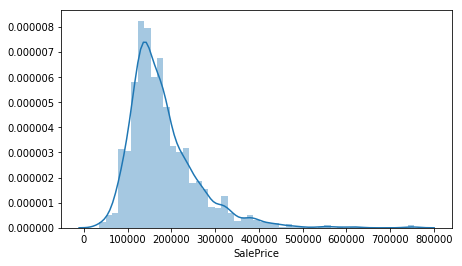

In [4]:
#simple histogram of sale price
_ = plt.figure(figsize=(7,4))
_ = sns.distplot(df.SalePrice)

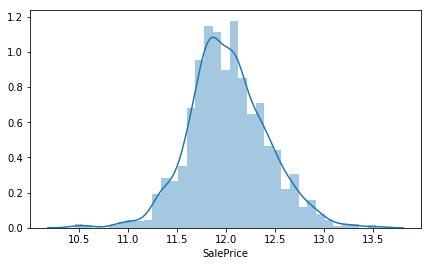

In [5]:
#log of sale price is more normally distributed
_ = plt.figure(figsize=(7,4))
_ = sns.distplot(df.SalePrice.apply(math.log))

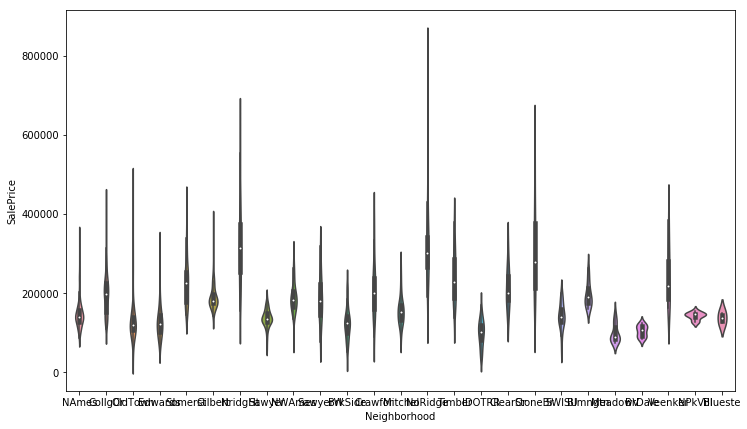

In [6]:
#distribution by neighborhood
_ = plt.figure(figsize=(12, 7))
sns.violinplot(x='Neighborhood', y='SalePrice', order=df.Neighborhood.value_counts().index, data=df)

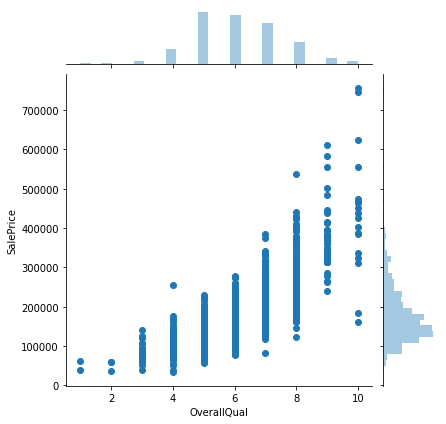

In [7]:
#Overall quality vs sale price
_ = sns.jointplot('OverallQual', 'SalePrice', df)

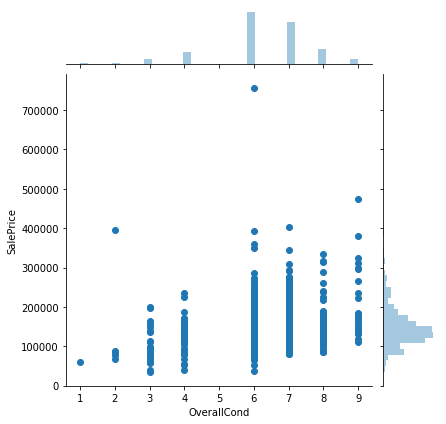

In [8]:
#Overall condition vs sale price -- the relationship is stronger if you remove the 5's
_ = sns.jointplot('OverallCond', 'SalePrice', df[df['OverallCond']!=5])

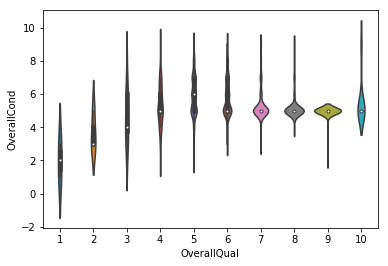

In [9]:
#Overall quality vs. overall condition... are they the same thing?
#Poor quality tends to be associated with poor condition, but once you get to decent quality there is no longer
#a relationship with condition
_ = sns.violinplot(x='OverallQual', y='OverallCond', data=df)

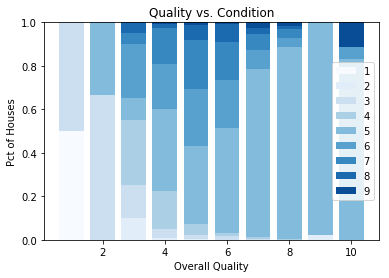

In [10]:
#again, overall quality vs. condition
a = df.groupby(['OverallQual', 'OverallCond']).Street.count().rename('count').reset_index()
a = a.pivot(index='OverallQual', columns='OverallCond', values='count')
a['row_totals'] = a.apply(lambda h: sum([0 if pd.isna(x) else x for x in h]), axis=1)
a = a.apply(lambda c: c/c['row_totals'], axis=1)
a = a.fillna(value=0)

colors=cm.Blues(np.linspace(0, 1, 10))

starts = pd.Series(np.zeros(10))
starts.index = range(1,11)

i=0
for c in a.iloc[:, :-1].iteritems():
    _ = plt.bar(x = a.index, height = c[1], bottom = starts, color=colors[i], label=c[0])
    starts += c[1]
    i += 1
    
    

_ = plt.xlabel('Overall Quality')
_ = plt.ylabel('Pct of Houses')
_ = plt.title('Quality vs. Condition')
_ = plt.legend()

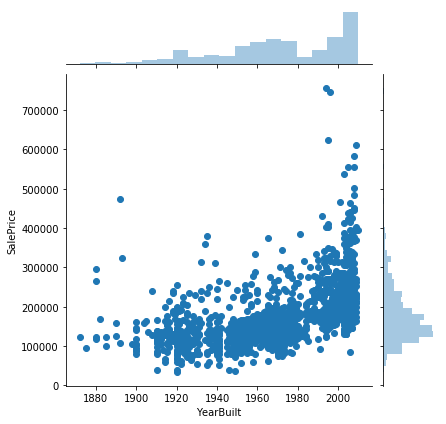

In [11]:
#Year built vs sale-price
_ = sns.jointplot('YearBuilt', 'SalePrice', df)

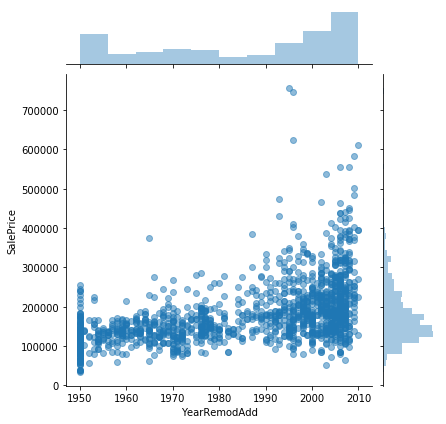

In [12]:
#Year remodeled vs sale-price
_ = sns.jointplot('YearRemodAdd', 'SalePrice', df, alpha=0.5)

#Seems like 1950 is a default?

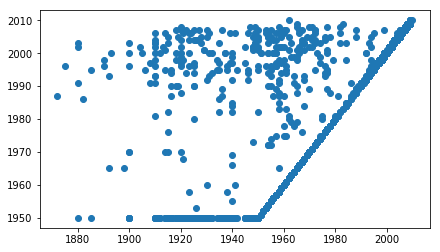

In [13]:
#Confirmed above takeaway
_ = plt.figure(figsize=(7, 4))
plt.scatter(df.YearBuilt, df.YearRemodAdd)

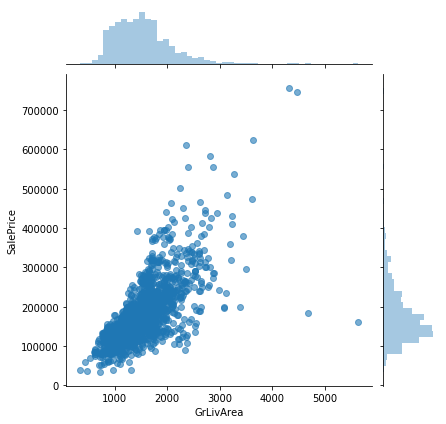

In [14]:
#Above grade living sq feet vs sale-price
_ = sns.jointplot('GrLivArea', 'SalePrice', df, alpha=0.6)

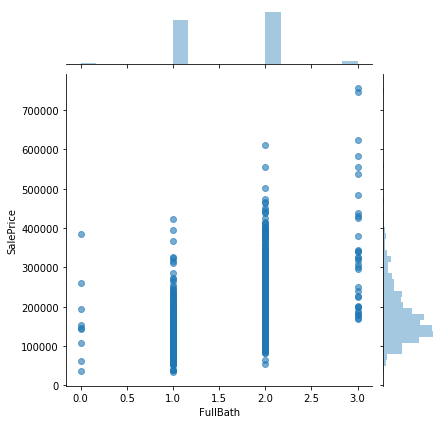

In [15]:
#Full baths vs sale-price
_ = sns.jointplot('FullBath', 'SalePrice', df, alpha=0.6)

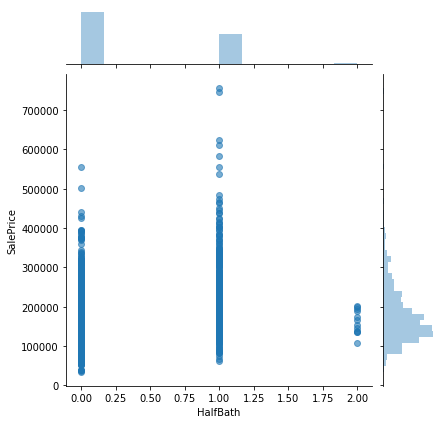

In [16]:
#Half baths vs sale-price
_ = sns.jointplot('HalfBath', 'SalePrice', df, alpha=0.6)

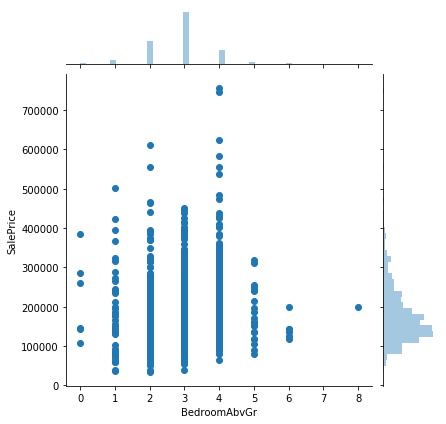

In [17]:
#Bedrooms vs sale-price
_ = sns.jointplot('BedroomAbvGr', 'SalePrice', df)

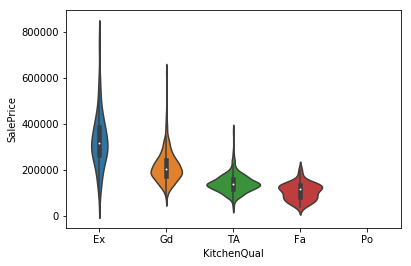

In [18]:
#Sale price vs. kitchen quality
_ = sns.violinplot(x='KitchenQual', y='SalePrice', order=['Ex', 'Gd', 'TA', 'Fa', 'Po'], data=df)

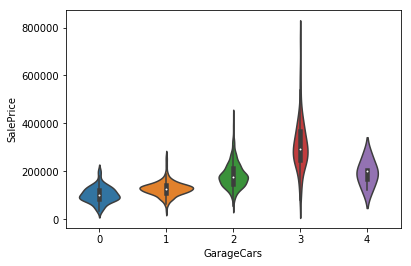

In [19]:
#Number of car garage
_ = sns.violinplot(x='GarageCars', y='SalePrice', data=df)

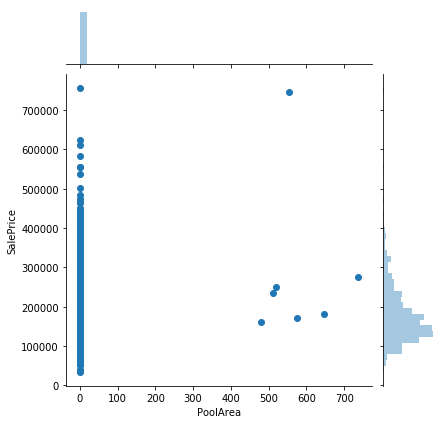

In [20]:
sns.jointplot('PoolArea', 'SalePrice', df)

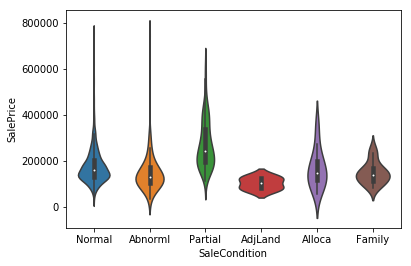

In [21]:
sns.violinplot(x='SaleCondition', y='SalePrice', data=df)

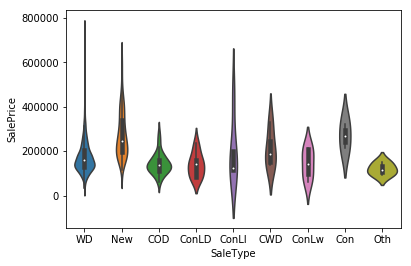

In [22]:
sns.violinplot(x='SaleType', y='SalePrice', data=df)

In [23]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [24]:
df.select_dtypes(include=[int, float]).corrwith(df.SalePrice).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [25]:
sorted(list(df['GarageCars'].unique()))

[0, 1, 2, 3, 4]

Text(0.5,0,'Overall Quality')

Text(0.5,0,'Sq. Footage')

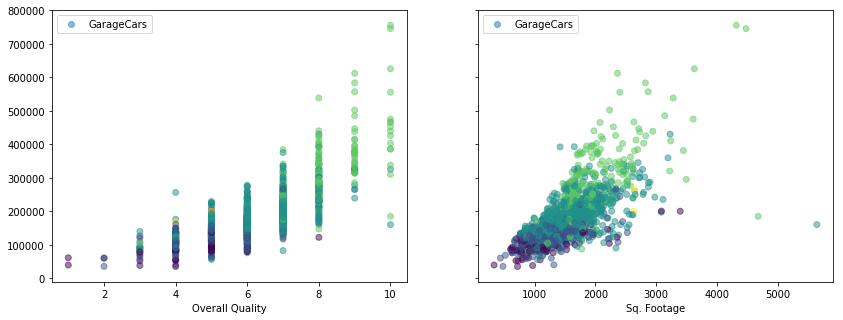

In [26]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5))
ax[0].scatter(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.5, c = 'GarageCars', label = 'GarageCars')
ax[0].set_xlabel('Overall Quality')
ax[0].legend()
ax[1].scatter(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.5, c = 'GarageCars', label = 'GarageCars')
ax[1].set_xlabel('Sq. Footage')
plt.legend()

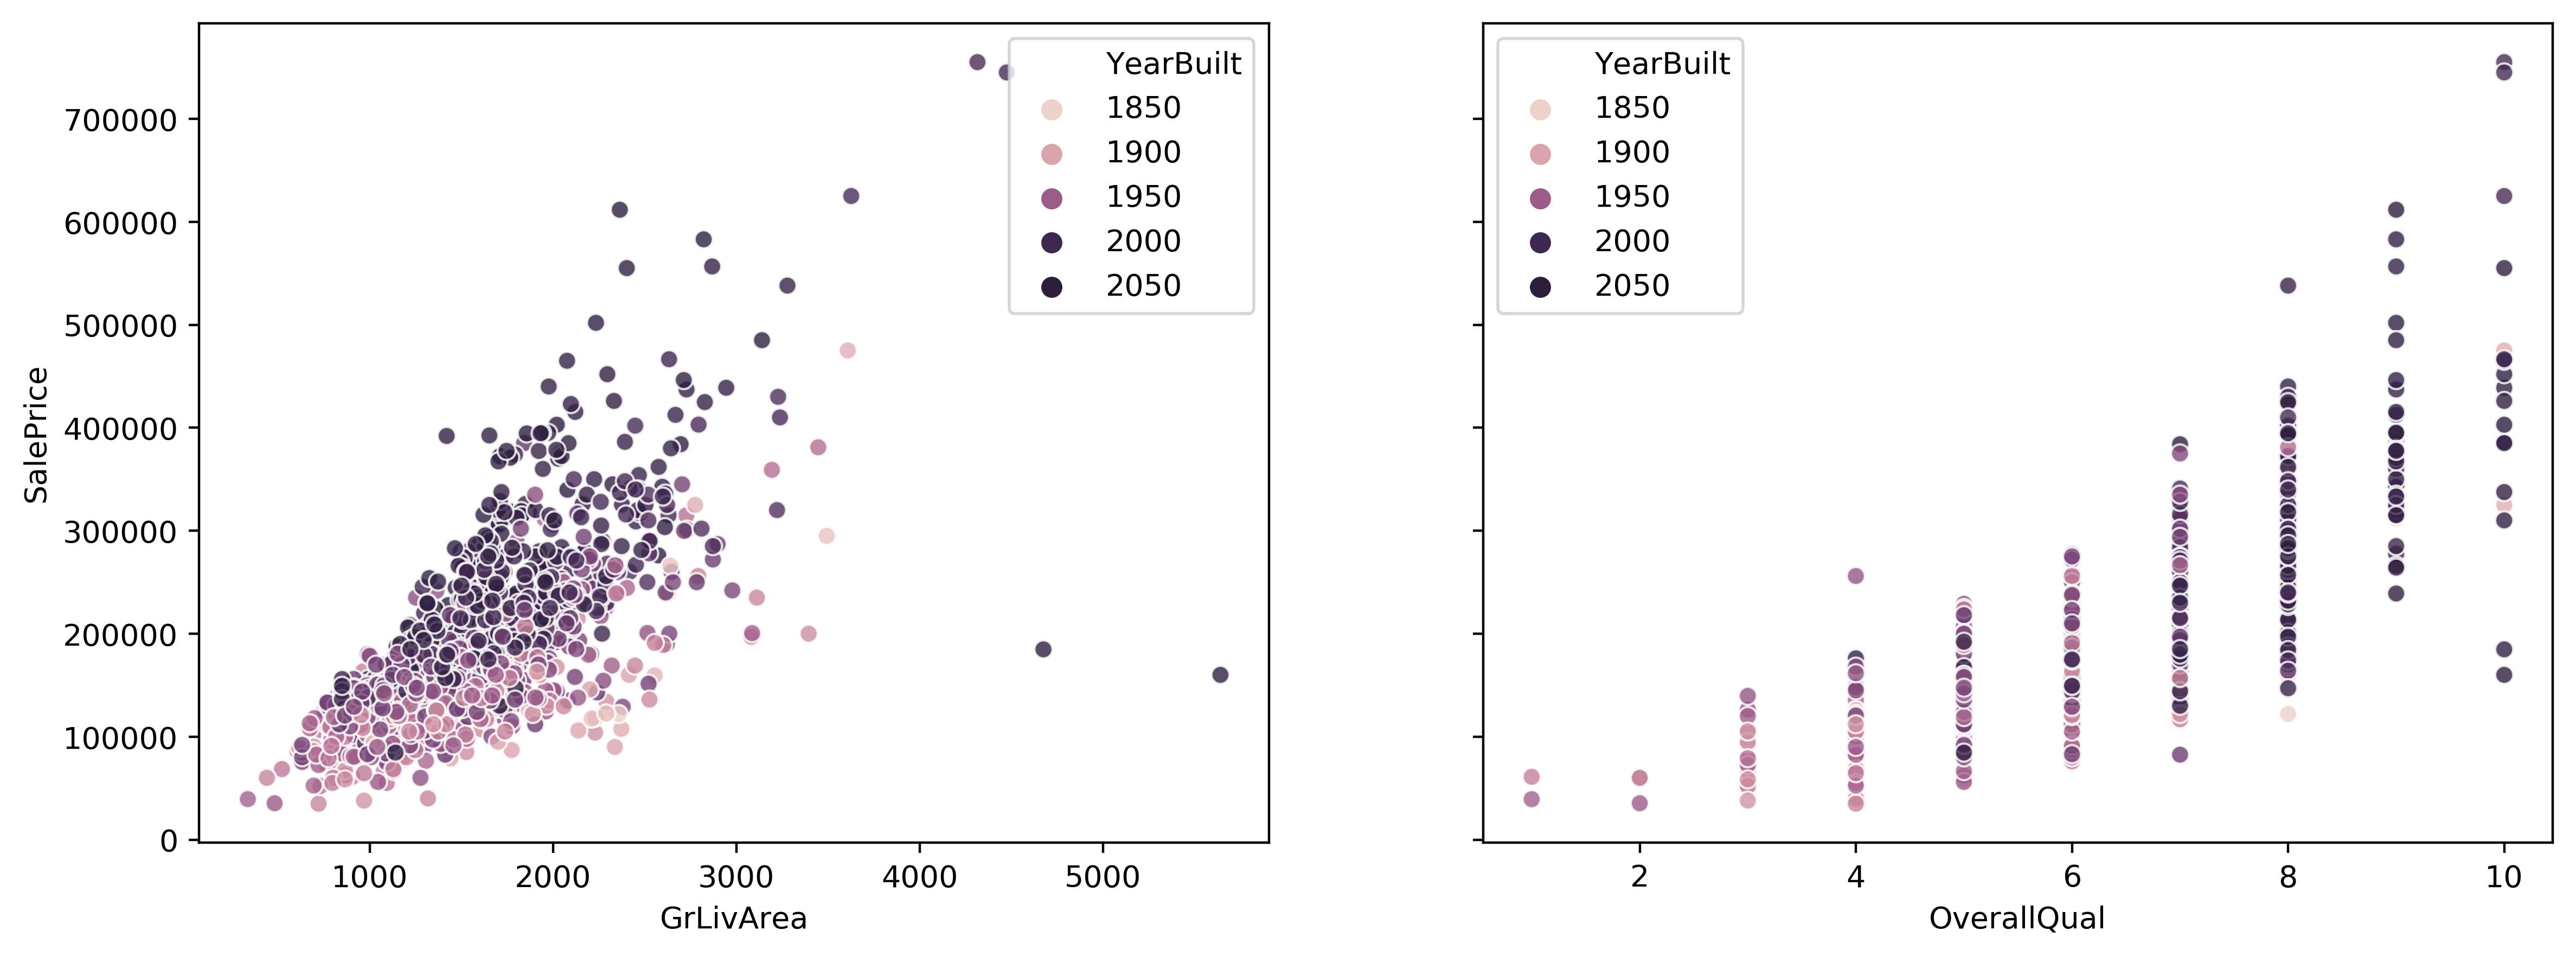

In [27]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = 'YearBuilt', ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = 'YearBuilt', ax=ax[1])

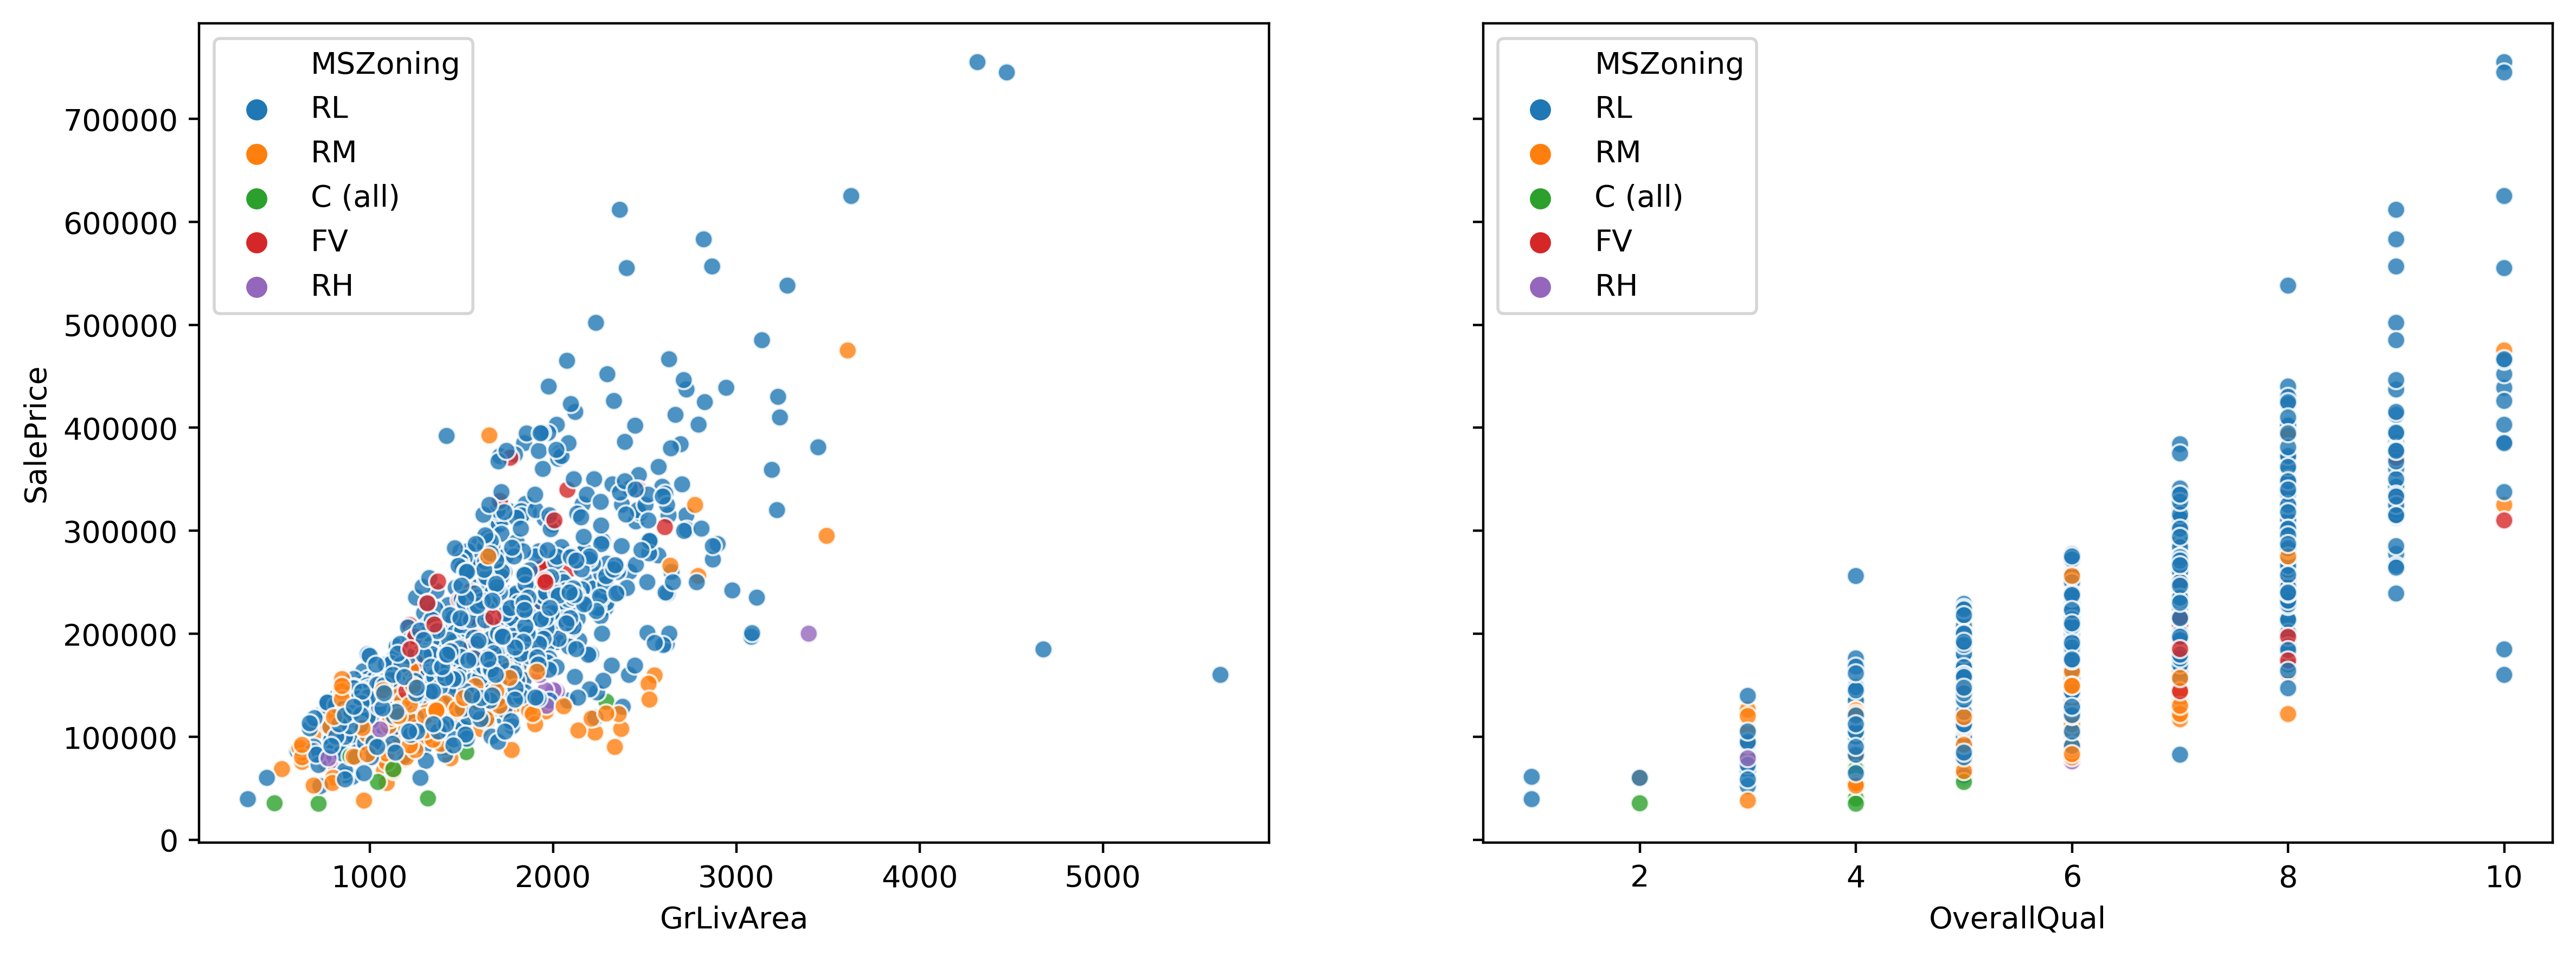

In [28]:
dim3 = 'MSZoning'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[1])

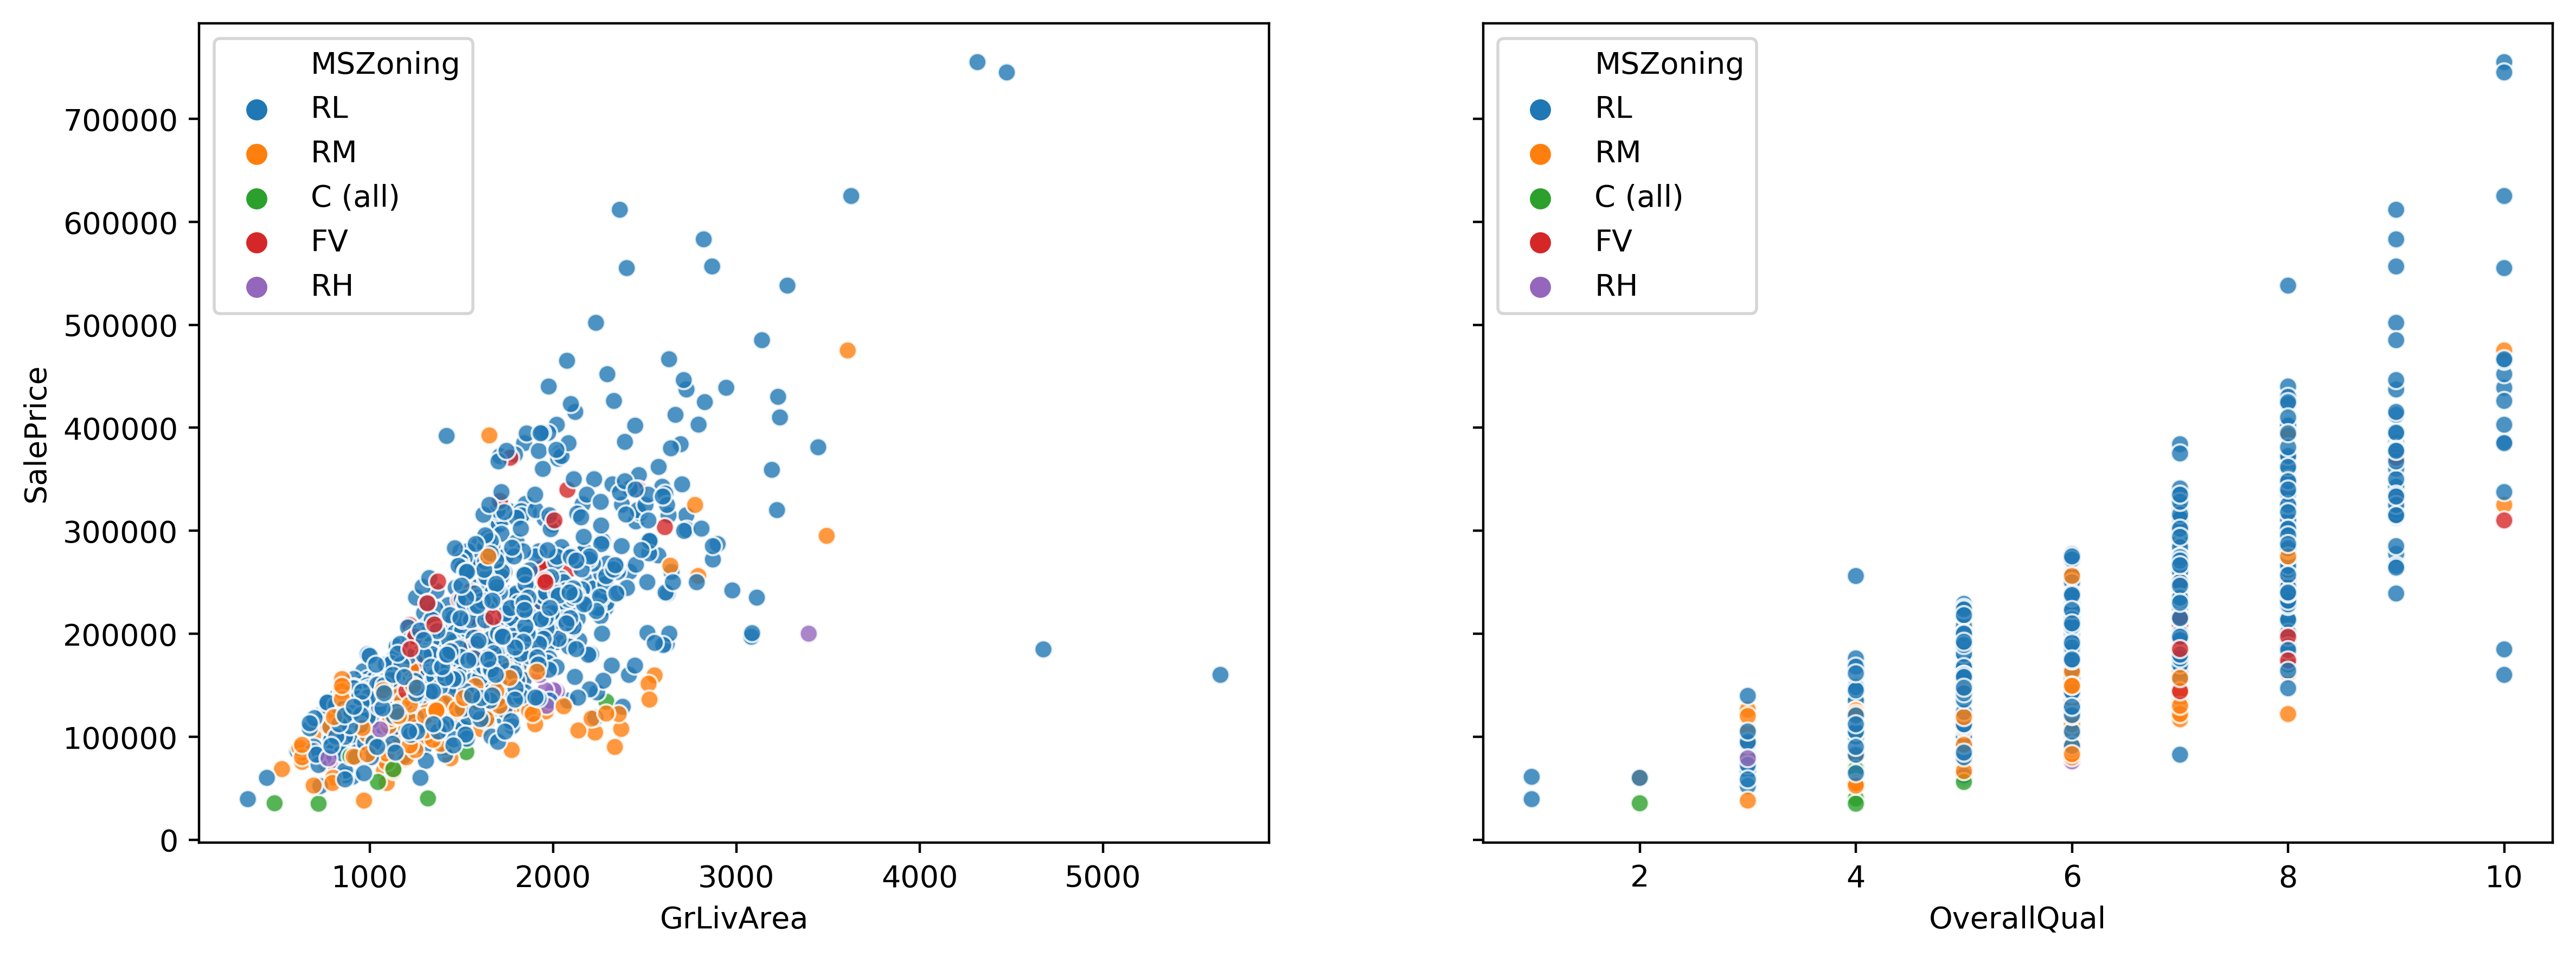

In [29]:
dim3 = 'MSZoning'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[1])

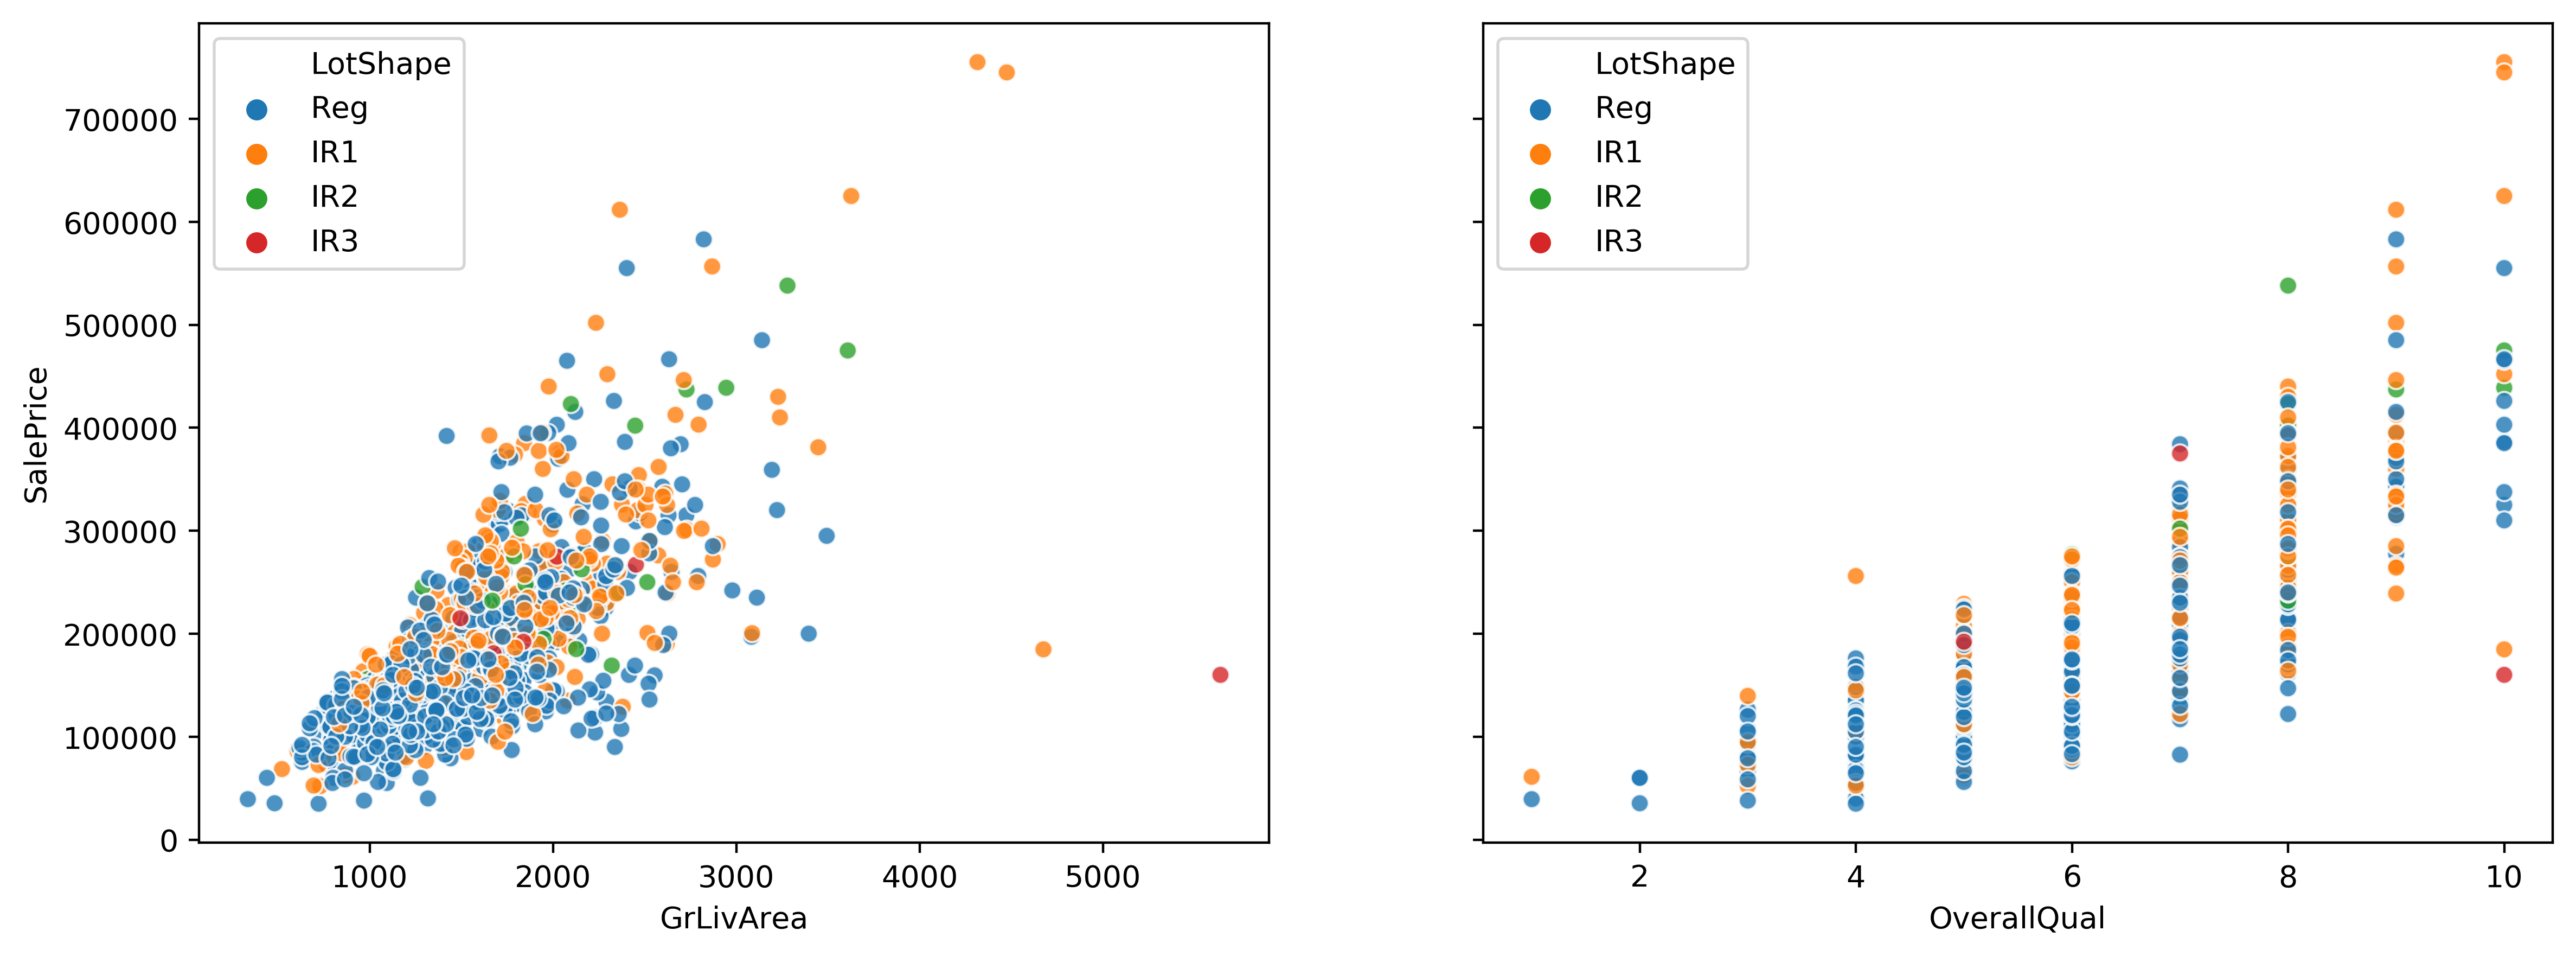

In [30]:
#More 'purity' of lot shape for lower-priced houses
dim3 = 'LotShape'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[1])

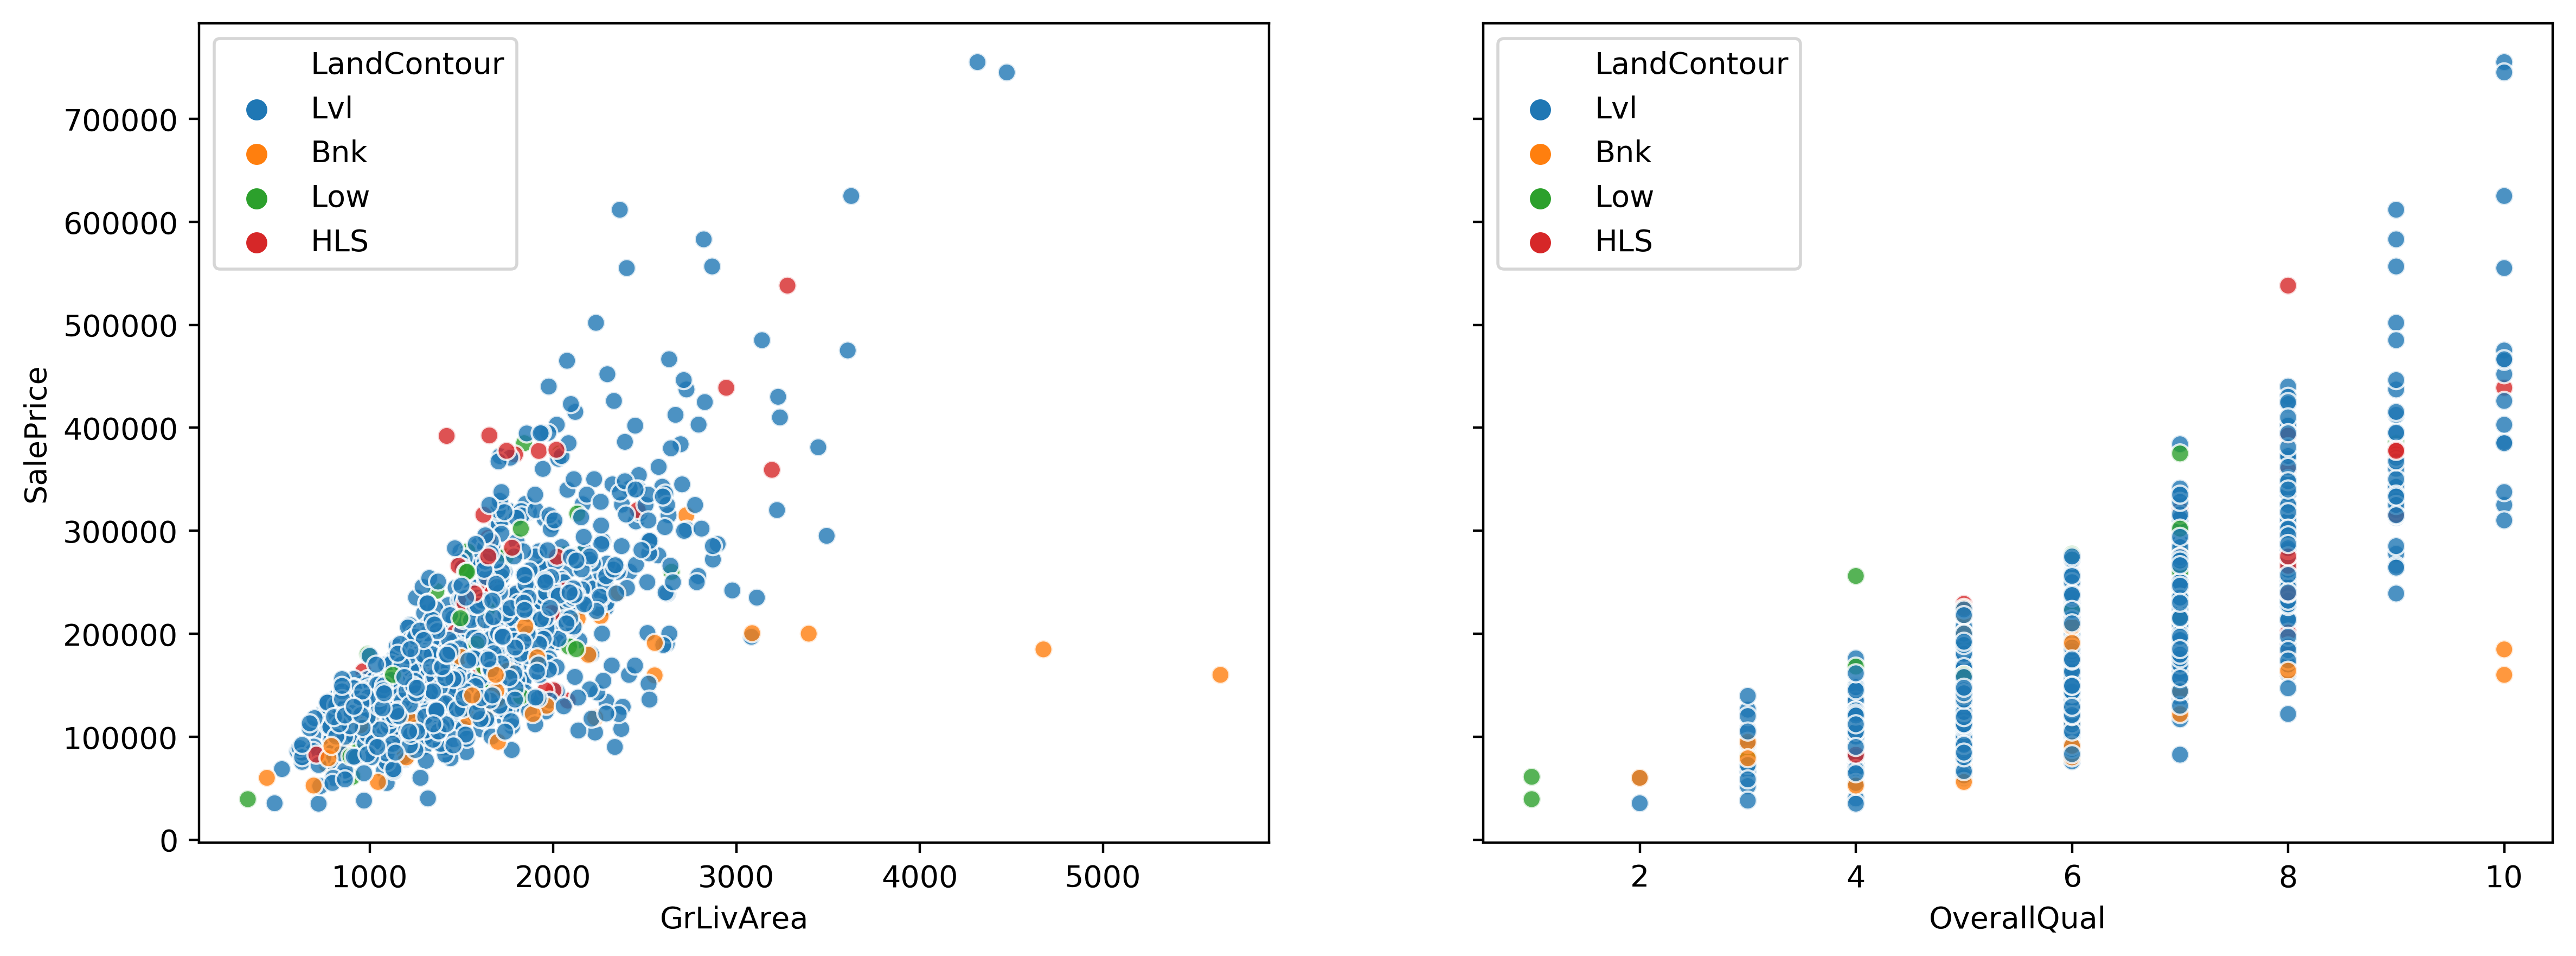

In [31]:
#More 'purity' of lot shape for lower-priced houses
dim3 = 'LandContour'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[1])

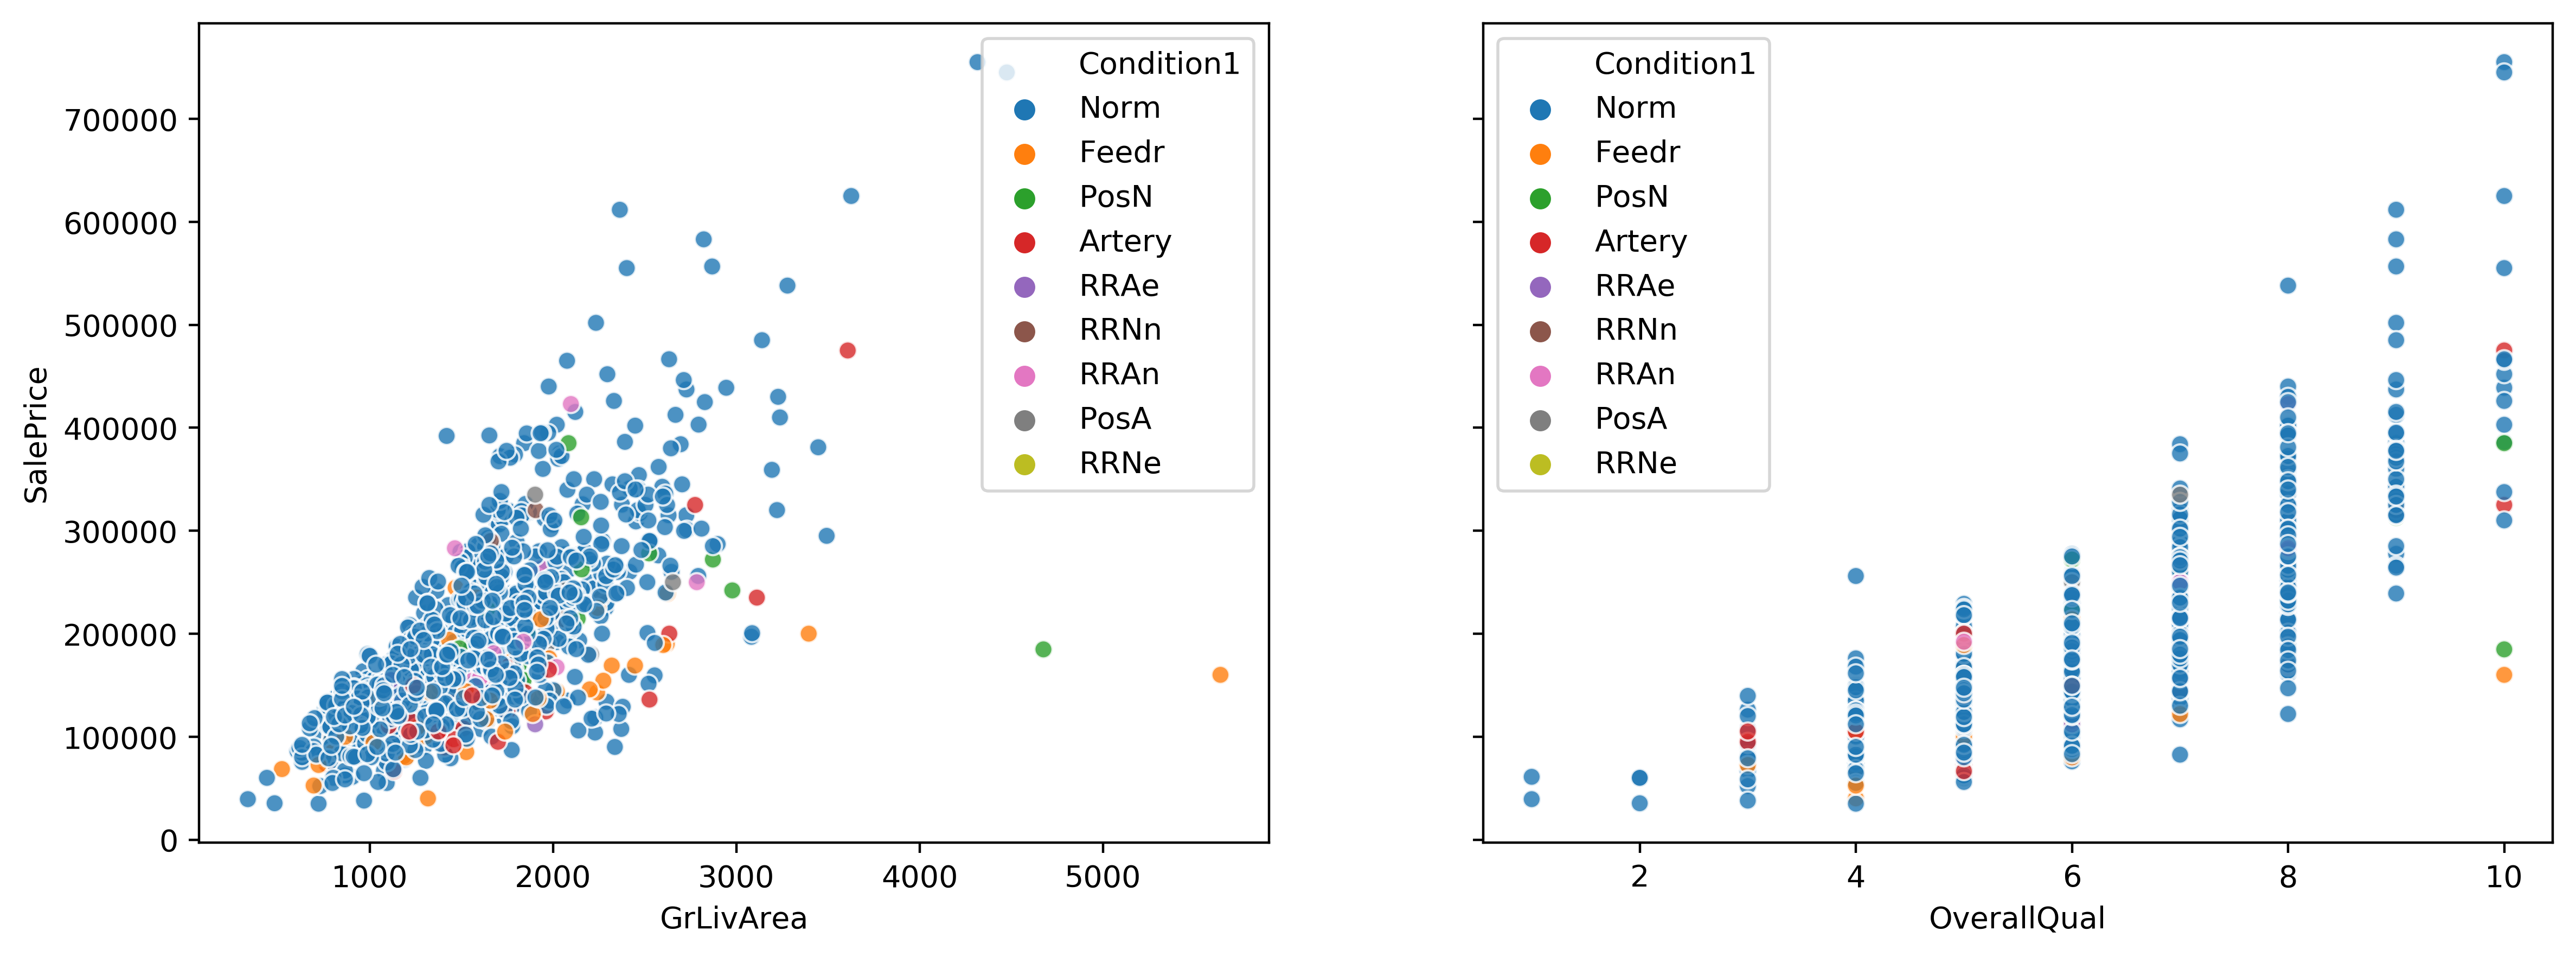

In [32]:
#More 'purity' of lot shape for lower-priced houses
dim3 = 'Condition1'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.8, hue = dim3, ax=ax[1])

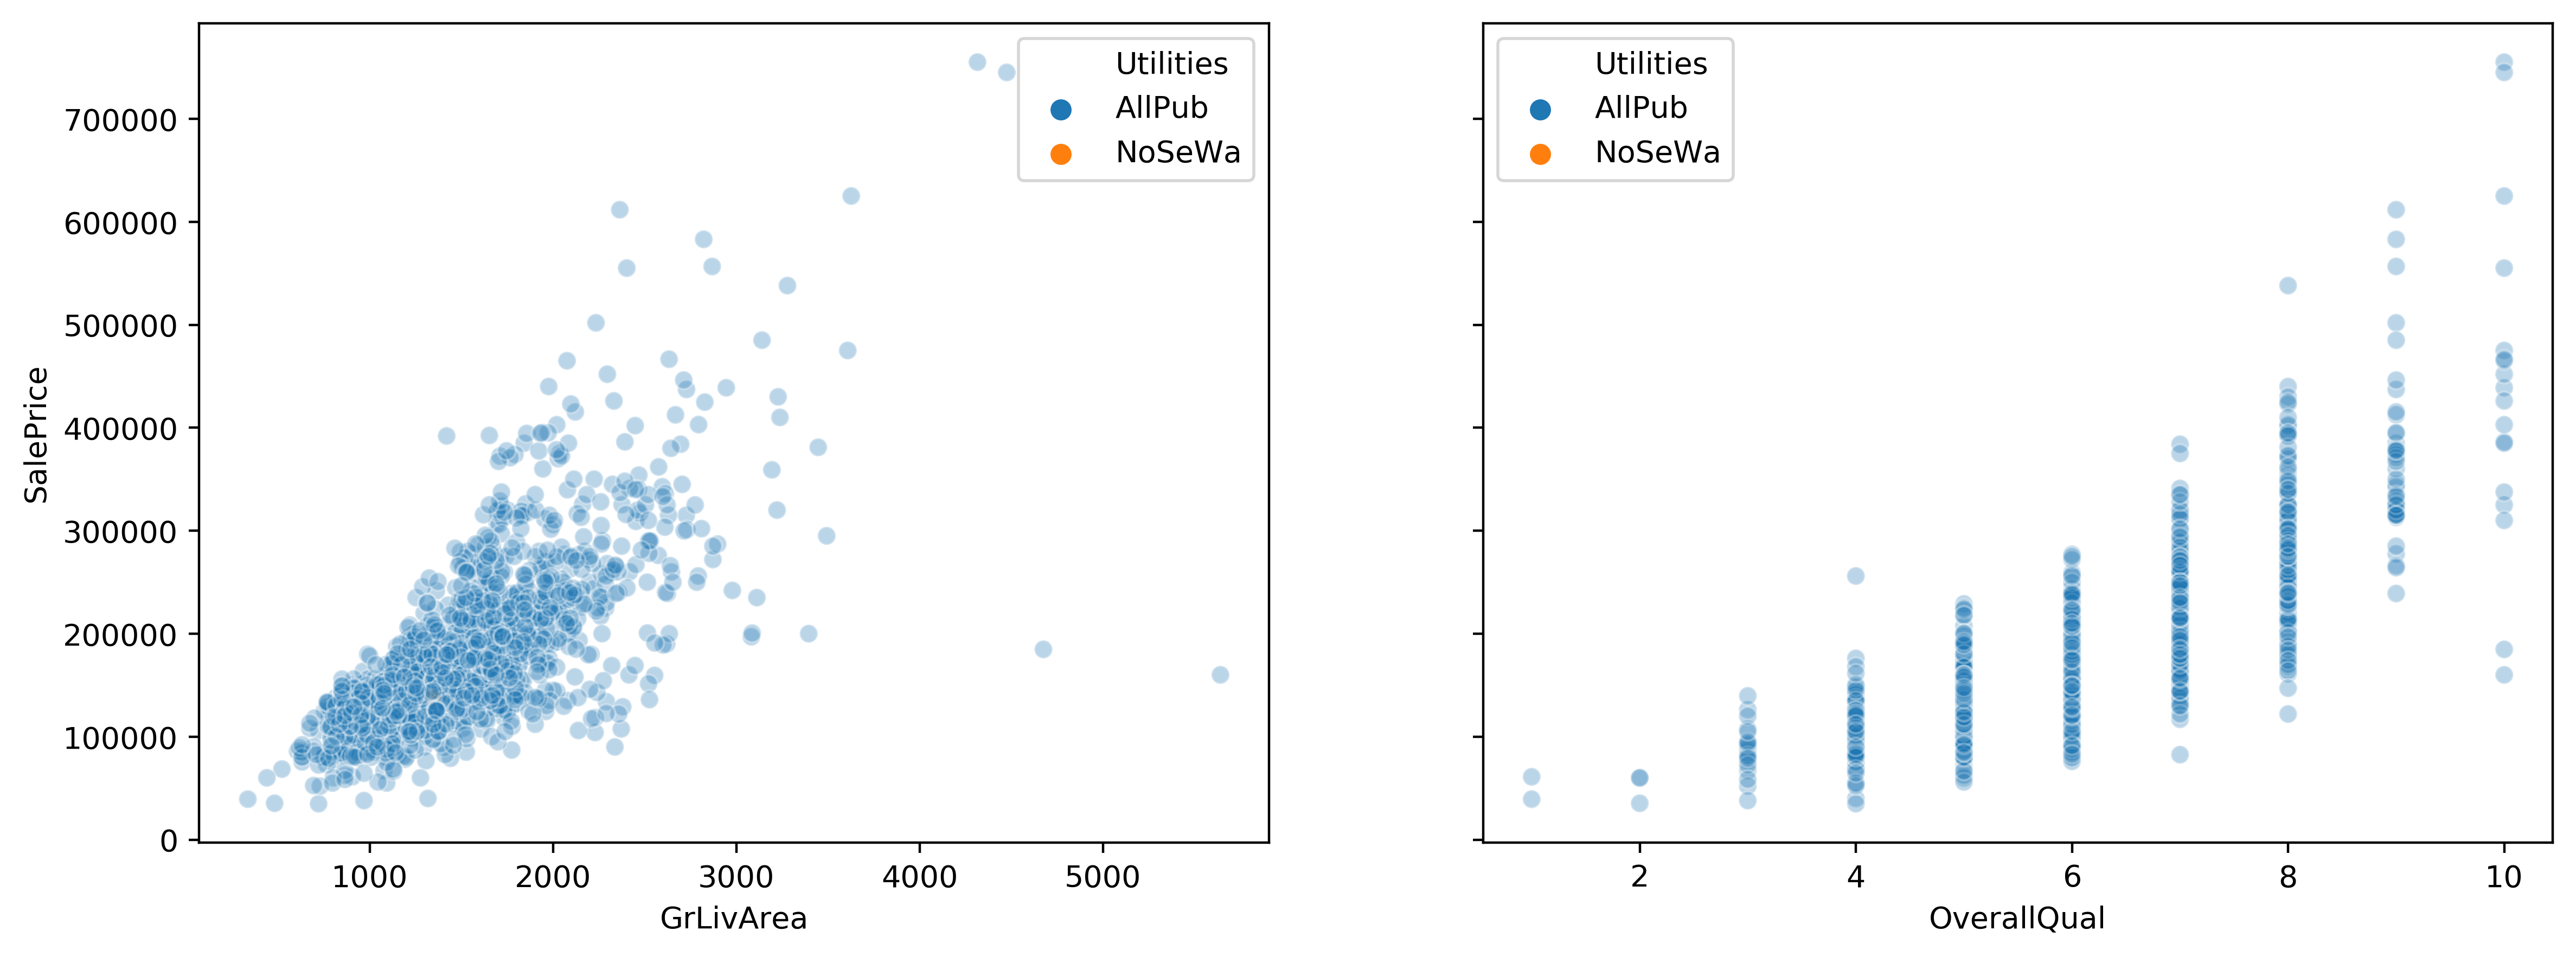

In [34]:
#More 'purity' of lot shape for lower-priced houses
dim3 = 'Utilities'
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (14,5), dpi=400)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.3, hue = dim3, ax=ax[0])
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.3, hue = dim3, ax=ax[1])

In [78]:
import ipywidgets as widgets
from ipywidgets import interact

dim3 = widgets.Dropdown(
    options=df.columns,
    index=0,
    description='Choose var:',
    disabled=False
)

def f(x):
    #Straight distribution of selected variable against sale price
    _ = plt.figure(figsize = (10,3), dpi=100)
    if df[x].dtype == 'O':
        _ = sns.boxplot(data = df, x = x, y = 'SalePrice')
        _ = plt.title('Sale Price Distribution by {}'.format(x))
    else:
        _ = sns.jointplot(data = df, x = x, y = 'SalePrice')
        _ = plt.title('Sale Price Distribution by {}'.format(x))


    #What additional information does it add after factoring in the sq footage or overall qualiity?
    _ = fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,3), dpi=100)
    _ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.3, hue = x, ax=ax[0])
    _ = ax[0].set_title('Effect of {} after sq footage'.format(x))
    _ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.3, hue = x, ax=ax[1])
    _ = ax[1].set_title('Effect of {} after overall quality'.format(x))

_ = interact(f, x=dim3)

interactive(children=(Dropdown(description='Choose var:', options=('MSSubClass', 'MSZoning', 'LotFrontage', 'L…

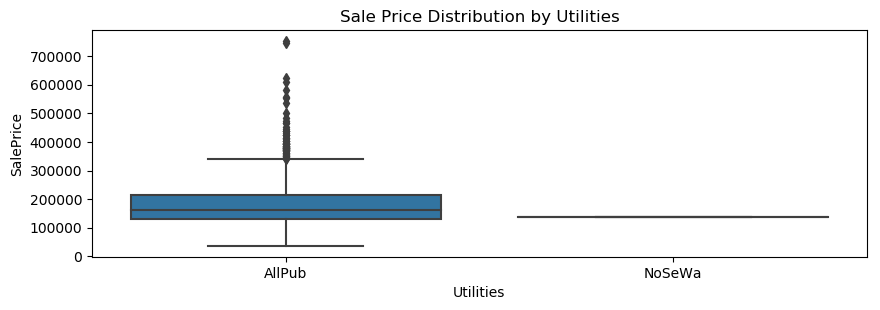

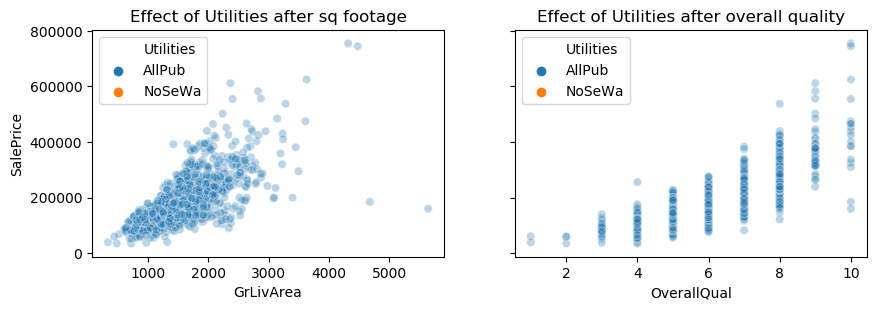

In [50]:
#CHECK ANY VARIABLE!!!
dim3 = 'Utilities'


#Straight distribution of selected variable against sale price
_ = plt.figure(figsize = (10,3), dpi=100)
if df[dim3].dtype == 'O':
    _ = sns.boxplot(data = df, x = dim3, y = 'SalePrice')
    _ = plt.title('Sale Price Distribution by {}'.format(dim3))
else:
    _ = sns.jointplot(data = df, x = dim3, y = 'SalePrice')
    _ = plt.title('Sale Price Distribution by {}'.format(dim3))

    
#What additional information does it add after factoring in the sq footage or overall qualiity?
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10,3), dpi=100)
_ = sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', alpha=0.3, hue = dim3, ax=ax[0])
_ = ax[0].set_title('Effect of {} after sq footage'.format(dim3))
_ = sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', alpha=0.3, hue = dim3, ax=ax[1])
_ = ax[1].set_title('Effect of {} after overall quality'.format(dim3))

In [51]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [34]:
print(df.sort_values(by='GrLivArea', ascending=False).iloc[0,:])

MSSubClass            60
MSZoning              RL
LotFrontage          313
LotArea            63887
Street              Pave
Alley                NaN
LotShape             IR3
LandContour          Bnk
Utilities         AllPub
LotConfig         Corner
LandSlope            Gtl
Neighborhood     Edwards
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual           10
OverallCond            5
YearBuilt           2008
YearRemodAdd        2008
RoofStyle            Hip
RoofMatl         ClyTile
Exterior1st       Stucco
Exterior2nd       Stucco
MasVnrType         Stone
MasVnrArea           796
ExterQual             Ex
ExterCond             TA
Foundation         PConc
BsmtQual              Ex
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Ex
TotRmsAbvGrd          12
Functional           Typ
Fireplaces             3
FireplaceQu           Gd
GarageType        Attchd
GarageYrBlt         2008
